# Many-objective

Throughout this section, we will solve the three-objective problem DTLZ2 imported from [pymoo](https://github.com/anyoptimization/pymoo/blob/main/pymoo/problems/many/dtlz.py).

The definition of "many-objective" differs according to the refence used. Some issues arise in maintaining population diversity in the survival stage for problems with more than two objectives. Therefore we will consider here "many-objective problems those with more than two objectives.

For more details about the algorithms used, please refer to the [Algorithms](../algorithms.rst) section.

In [1]:
import matplotlib.pyplot as plt
from pymoo.optimize import minimize
from pymoode.algorithms import NSDER
from pymoode.algorithms import GDE3
from pymoode.survival import RankAndCrowding
from pymoo.util.ref_dirs import get_reference_directions

**DTLZ2**

$$
\begin{align}
    \text{min} \; \; & f_1(\boldsymbol{x}) = \mathrm{cos}(\pi / 2 x_1) \, \mathrm{cos}(\pi / 2 x_2) (1 + g(\boldsymbol{x}))\\
    & f_2(\boldsymbol{x}) = \mathrm{cos}(\pi / 2 x_1) \, \mathrm{sin}(\pi / 2 x_2) (1 + g(\boldsymbol{x}))\\
    & f_3(\boldsymbol{x}) = \mathrm{sin}(\pi / 2 x_1) (1 + g(\boldsymbol{x}))\\
    \text{s.t.} \; \; & g(\boldsymbol{x}) = \sum_{i=1}^{3}(x_i - 0.5) ^ 2\\
    & 0.0 \leq \boldsymbol{x} \leq 1.0
\end{align}
$$

In [2]:
from pymoo.problems import get_problem

problem = get_problem("dtlz2")

In [3]:
NGEN = 150
POPSIZE = 136
SEED = 5

## GDE3-MNN

Let us instantiate a GDE3 algorithm and pass as the survival operator ``RankAndCrowding(crowding_func="mnn")``, which is suitable for problems with more than two objectives. Alternatively, one could have directly imported the GDE3MNN algorithm.

```python
from pymoode.algorithms import GDE3MNN
```

In [4]:
gde3 = GDE3(
    pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.2, F=(0.0, 1.0), gamma=1e-4,
    survival=RankAndCrowding(crowding_func="mnn"),
)

res_gde3 = minimize(
    problem,
    gde3,
    ('n_gen', NGEN),
    seed=SEED,
    save_history=False,
    verbose=False,
)

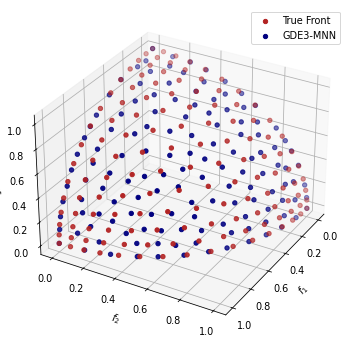

In [5]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=70, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_gde3.F[:, 0], res_gde3.F[:, 1], res_gde3.F[:, 2],
        color="navy", label="GDE3-MNN", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()

## NSDE-R

Let us now instantiate the NSDE-R algorithm, which uses DE reproduction operators with the survival strategy of NSGA-III.

In [6]:
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=15)

nsder = NSDER(ref_dirs=ref_dirs, pop_size=POPSIZE,
              variant="DE/rand/1/bin", CR=0.5, F=(0.0, 1.0), gamma=1e-4,
)

res_nsder = minimize(
    problem,
    nsder,
    ('n_gen', NGEN),
    seed=SEED,
    save_history=False,
    verbose=False,
)

c:\Users\Bruno\Desktop\Python Packages\pymoode\venv\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


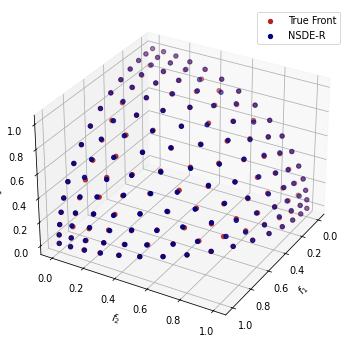

In [7]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=70, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_nsder.F[:, 0], res_nsder.F[:, 1], res_nsder.F[:, 2],
        color="navy", label="NSDE-R", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()